# Analyze ups and downs in the market and predict future stock price returns based on Indian Market data from 2000 to 2020.

In [30]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df = pd.read_csv('ADANIPORTS.BO.csv')

# Display the first few rows of the dataset.
df.head() 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-11-27,154.000000,230.000000,154.000000,192.339996,168.107727,74031075
1,2007-11-28,192.320007,197.940002,174.830002,178.970001,156.422165,17281850
2,2007-11-29,181.740005,182.979996,168.199997,177.130005,154.814026,20881765
3,2007-11-30,180.000000,191.399994,178.399994,184.600006,161.342865,15203175
4,2007-12-03,187.000000,199.000000,186.199997,194.130005,169.672226,9508660


# Data Preprocessing

In [31]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Price_Change    0
Year            0
Month           0
Day             0
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['Price_Change'] = df['Close'].pct_change()  # Percentage change in stock price


In [10]:
df['Price_Change'] = df['Price_Change'].fillna(0)


In [11]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [12]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price_Change,Year,Month,Day
0,2007-11-27,154.000000,230.000000,154.000000,192.339996,168.107727,74031075,0.000000,2007,11,27
1,2007-11-28,192.320007,197.940002,174.830002,178.970001,156.422165,17281850,-0.069512,2007,11,28
2,2007-11-29,181.740005,182.979996,168.199997,177.130005,154.814026,20881765,-0.010281,2007,11,29
3,2007-11-30,180.000000,191.399994,178.399994,184.600006,161.342865,15203175,0.042172,2007,11,30
4,2007-12-03,187.000000,199.000000,186.199997,194.130005,169.672226,9508660,0.051625,2007,12,3


#  Data Visualization

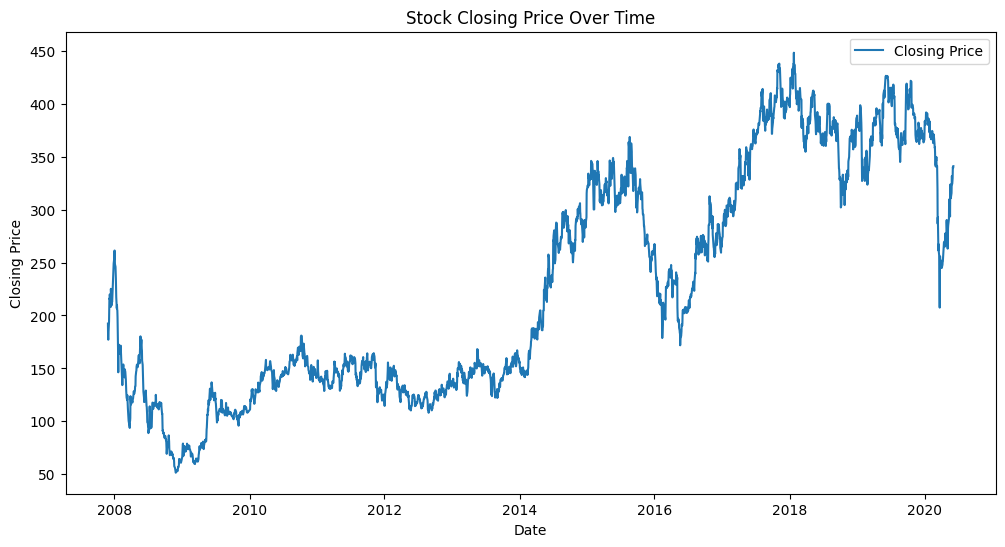

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

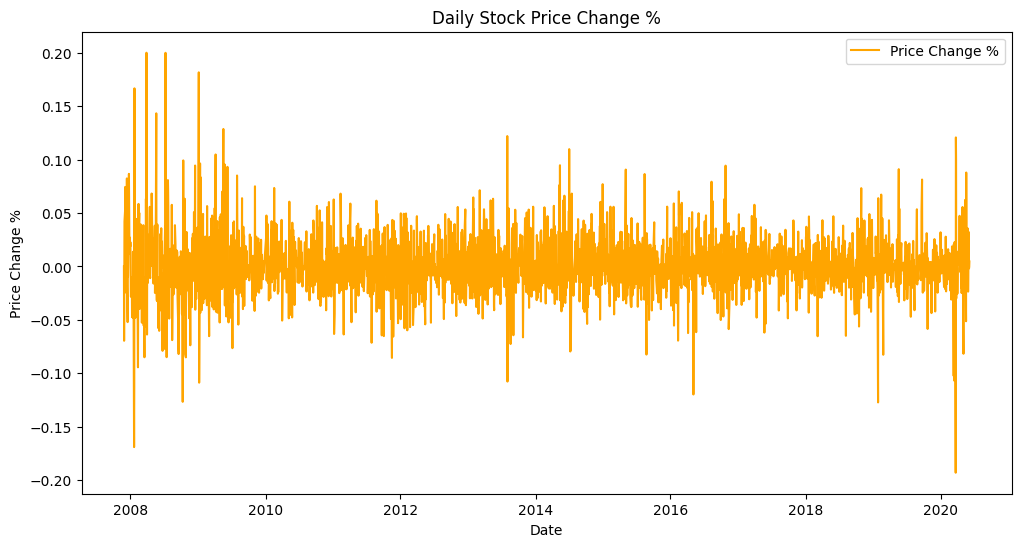

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Price_Change'], label='Price Change %', color='orange')
plt.title('Daily Stock Price Change %')
plt.xlabel('Date')
plt.ylabel('Price Change %')
plt.legend()
plt.show()

C:\Users\Vighnesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


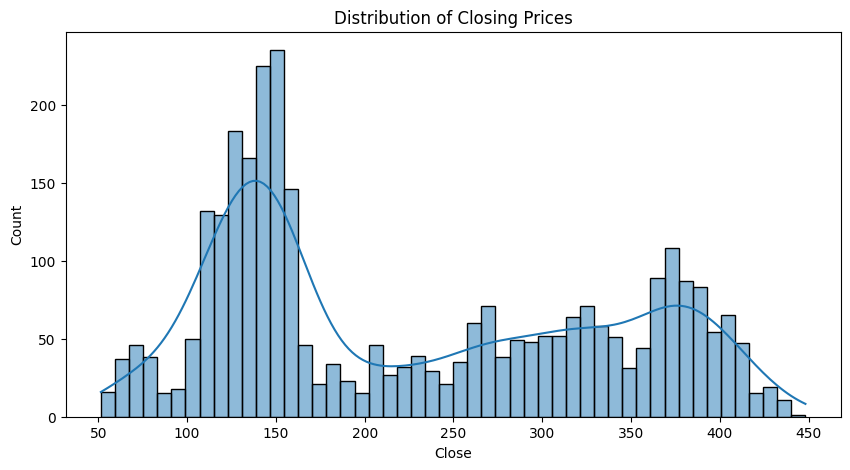

In [15]:
# Distribution of closing prices
plt.figure(figsize=(10,5))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.show()


 # Splitting Data for Training and Testing
 

In [16]:
X = df[['Year', 'Month', 'Day', 'Volume']]  # Features
y = df['Close']  # Target variable

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying Linear Regression Model

In [20]:
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train_scaled, y_train)
y_pred = linear_model.predict(X_test_scaled)

In [28]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')

# Accuracy based on R^2 (higher R^2 means better accuracy)
print(f'Model Accuracy (R^2 Score): {r2 * 100:.2f}%')


Mean Squared Error (MSE): 2596.2270621956354
Root Mean Squared Error (RMSE): 50.95318500541095
R^2 Score: 0.7821759893310619
Model Accuracy (R^2 Score): 78.22%


# Predicting future stock price

In [22]:
future_data = pd.DataFrame([[2021, 5, 15, 2000000]], columns=['Year', 'Month', 'Day', 'Volume'])


In [23]:
future_data_scaled = scaler.transform(future_data)


In [24]:
future_pred = linear_model.predict(future_data_scaled)
print(f'Predicted Stock Price for 2021-05-15: {future_pred[0]}')

Predicted Stock Price for 2021-05-15: 425.56944284698955


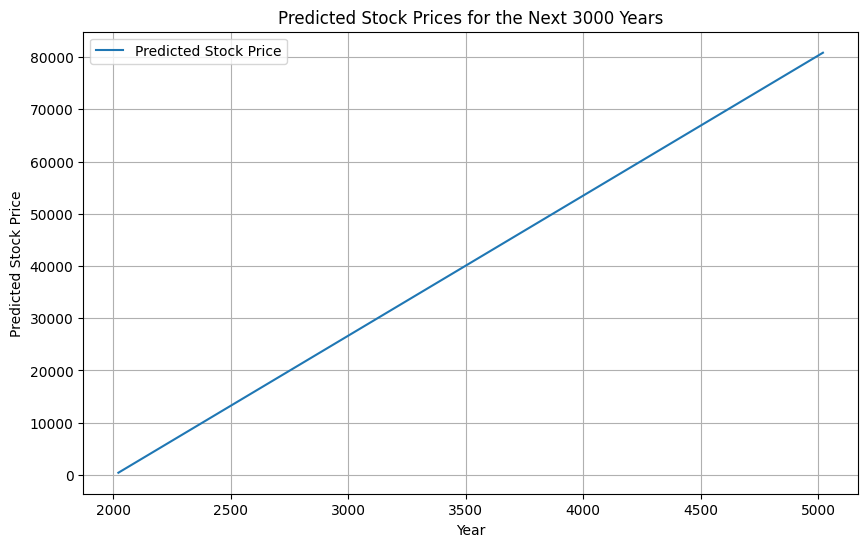

In [25]:


future_years = np.arange(2021, 2021 + 3000)  # from 2021 to 5021

# We'll assume the same month, day, and volume for simplicity 
future_month = 5
future_day = 15
future_volume = 2000000  # Estimated constant volume

# Create a DataFrame for future predictions
future_data = pd.DataFrame({
    'Year': future_years,
    'Month': [future_month] * len(future_years),
    'Day': [future_day] * len(future_years),
    'Volume': [future_volume] * len(future_years)
})

# Scale the future data
future_data_scaled = scaler.transform(future_data)

# Predict future stock prices
future_pred = linear_model.predict(future_data_scaled)

# Plot the future predictions
plt.figure(figsize=(10, 6))
plt.plot(future_years, future_pred, label='Predicted Stock Price')
plt.title('Predicted Stock Prices for the Next 3000 Years')
plt.xlabel('Year')
plt.ylabel('Predicted Stock Price')
plt.grid(True)
plt.legend()
plt.show()


In [27]:
# Display predicted stock prices for each year
for year, pred in zip(future_years, future_pred):
    print(f'Year: {year}, Predicted Stock Price: {pred:.2f}')



Year: 2021, Predicted Stock Price: 425.57
Year: 2022, Predicted Stock Price: 452.38
Year: 2023, Predicted Stock Price: 479.19
Year: 2024, Predicted Stock Price: 506.00
Year: 2025, Predicted Stock Price: 532.81
Year: 2026, Predicted Stock Price: 559.62
Year: 2027, Predicted Stock Price: 586.43
Year: 2028, Predicted Stock Price: 613.24
Year: 2029, Predicted Stock Price: 640.05
Year: 2030, Predicted Stock Price: 666.86
Year: 2031, Predicted Stock Price: 693.67
Year: 2032, Predicted Stock Price: 720.48
Year: 2033, Predicted Stock Price: 747.29
Year: 2034, Predicted Stock Price: 774.10
Year: 2035, Predicted Stock Price: 800.91
Year: 2036, Predicted Stock Price: 827.72
Year: 2037, Predicted Stock Price: 854.53
Year: 2038, Predicted Stock Price: 881.34
Year: 2039, Predicted Stock Price: 908.15
Year: 2040, Predicted Stock Price: 934.95
Year: 2041, Predicted Stock Price: 961.76
Year: 2042, Predicted Stock Price: 988.57
Year: 2043, Predicted Stock Price: 1015.38
Year: 2044, Predicted Stock Price